In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [66]:
data = pd.read_csv("datas/USvideos.csv")

In [67]:
df = pd.DataFrame(data)

In [68]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [69]:
df.shape

(40949, 16)

In [70]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [72]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [73]:
df.duplicated().sum()

np.int64(48)

In [74]:
df = df.drop_duplicates()

In [75]:
df.duplicated().sum()

np.int64(0)

In [76]:
# convert type 
def convert_type(column_name, dtype):
    df[column_name]  = df[column_name].astype(dtype)

In [77]:
convert_type("views",int)
convert_type("likes",int)
convert_type("dislikes",int)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

In [79]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")
df["publish_time"] = pd.to_datetime(df["publish_time"])

In [80]:
numerical_data_columns = ["views","likes","dislikes","comment_count"]
non_numerical= ["title","category_id","publish_time","channel_title"]

In [81]:
corr = df[numerical_data_columns].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.849179,0.472216,0.617657
likes,0.849179,1.000000,0.447188,0.803088
dislikes,0.472216,0.447188,1.000000,0.700192
comment_count,0.617657,0.803088,0.700192,1.000000


In [82]:
df["like_rates"] = df["likes"]/df["views"]
df["dislike_rates"] = df["dislikes"]/df["views"]
df["comment_rate"] = df["comment_count"]/df["views"]

In [83]:

df.groupby("publish_time")["views"].max()[:1]

publish_time
2006-07-23 08:24:11+00:00    258506
Name: views, dtype: int64

In [84]:
# What upload day of week gets the most views?
df["day"] = df["publish_time"].dt.day_name()
df["hour"] = df["publish_time"].dt.hour

In [85]:
grouped_day = df.groupby("day")
print(f"day with most views: {grouped_day["views"].max()[:1]}")
print()
print(f"day with most likes: {grouped_day["likes"].max()[:1]}")
print()
grouped_hour = df.groupby("hour")
print(f"hour with most views: {grouped_hour["views"].max()[:1]}")
print()
print(f"hour with most likes: {grouped_hour["likes"].max()[:1]}")
print()

day with most views: day
Friday    148689896
Name: views, dtype: int64

day with most likes: day
Friday    5613827
Name: likes, dtype: int64

hour with most views: hour
0    36101955
Name: views, dtype: int64

hour with most likes: hour
0    998395
Name: likes, dtype: int64



In [86]:
# Visualizing the data

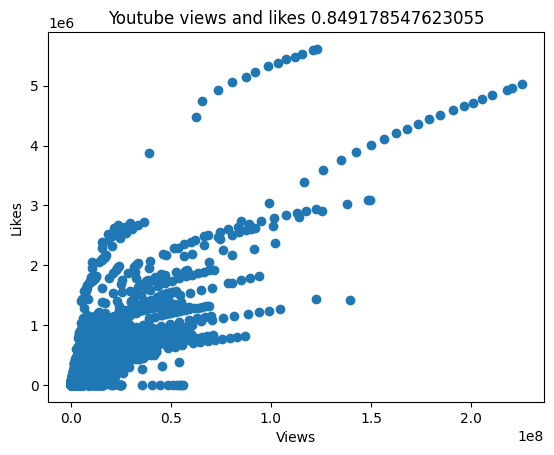

In [87]:
views = list(df["views"])
likes = list(df["likes"])

plt.scatter(x=views, y=likes)
plt.title(f"Youtube views and likes {df[numerical_data_columns].corr().loc["views"]["likes"]}")
plt.ylabel("Likes")
plt.xlabel("Views")
plt.savefig("charts/views_vs_likes.png")
plt.show()

In [88]:
# Bar chart
label = df.nlargest(5,"views")["title"]
x = df["views"].sort_values(ascending=False).head(3)

In [96]:
# plt.bar(label,x)
# # plt.figure()
# plt.xlabel("Title")
# plt.ylabel("Views")

In [97]:
x

38547    225211923
38345    220490543
38146    217750076
Name: views, dtype: int64

In [98]:
label

38547    Childish Gambino - This Is America (Official V...
38345    Childish Gambino - This Is America (Official V...
38146    Childish Gambino - This Is America (Official V...
37935    Childish Gambino - This Is America (Official V...
37730    Childish Gambino - This Is America (Official V...
Name: title, dtype: object

In [99]:
new_label = (df.groupby("title",as_index=False)["views"].max().sort_values("views",ascending=False).head(10))

In [100]:
labels = new_label["title"]
view_count = new_label["views"]

C:\Users\dipak\AppData\Local\Temp\ipykernel_17196\1980779969.py:6: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17196\1980779969.py:6: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17196\1980779969.py:6: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17196\1980779969.py:6: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17196\1980779969.py:6: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17196\1980779969.py:9: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from f

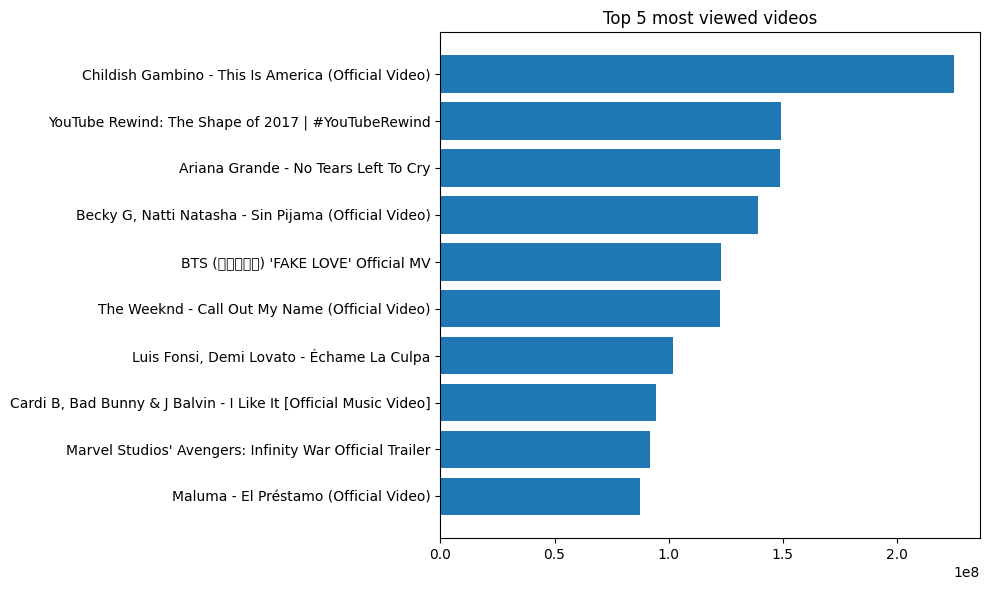

In [104]:

plt.figure(figsize=(10,6))
plt.barh(labels,view_count)
# plt.xlabel("Title")
# plt.ylabel("Views")
plt.title("Top 5 most viewed videos")
plt.tight_layout()
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.savefig("charts/barh.png")
plt.show()

In [105]:
import seaborn as sns

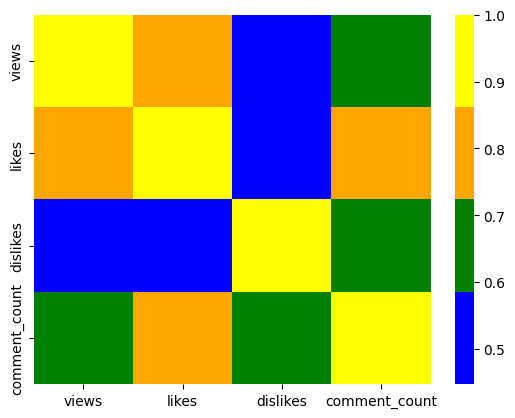

In [106]:
sns.heatmap(corr,cmap=["blue","green","orange","yellow"])
plt.savefig("charts/heatmap")

In [107]:
# Videos with more than 1 million views
most_viewed = df[df["views"]>1000000]

In [110]:
len(most_viewed)

16309

In [111]:
most_viewed_corr = most_viewed[numerical_data_columns].corr()
print(most_viewed_corr)

                  views     likes  dislikes  comment_count
views          1.000000  0.831171  0.458478       0.591178
likes          0.831171  1.000000  0.432140       0.793144
dislikes       0.458478  0.432140  1.000000       0.695318
comment_count  0.591178  0.793144  0.695318       1.000000


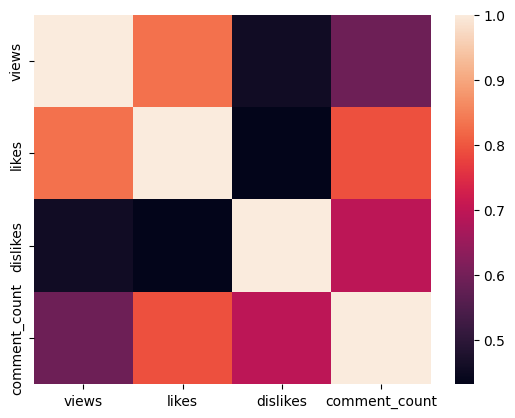

In [112]:
sns.heatmap(most_viewed_corr)
plt.savefig("charts/most_viewed_corr")

In [113]:
new_corr =df[["views","like_rates"]].corr()
new_corr
print(new_corr)

               views  like_rates
views       1.000000   -0.034896
like_rates -0.034896    1.000000


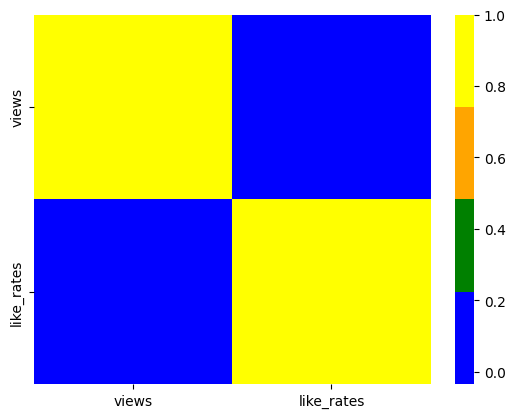

In [114]:
sns.heatmap(new_corr,cmap=["blue","green","orange","yellow"])
plt.savefig("charts/new_corr")

In [115]:
new_label = df.groupby("title",as_index=False)["views"].max().sort_values("views",ascending=False)

In [116]:
top = df.loc[new_label.head(10).index]
top

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_rates,dislike_rates,comment_rate,day,hour
1102,5530I_pYjbo,2017-11-19,How I Trained My Cats,JunsKitchen,26,2017-11-14 12:06:56+00:00,"how|""trained""|""cat""|""cats""|""train""|""how to""|""h...",2415668,162209,971,...,https://i.ytimg.com/vi/5530I_pYjbo/default.jpg,False,False,False,►EQUIPMENT I use on my channel that you can bu...,0.067149,0.000402,0.003592,Tuesday,12
6291,wd8h1iND_ys,2017-12-15,My House is Still Burned Down,William Osman,28,2017-12-12 17:32:25+00:00,"laser cutter|""william osman""|""crappy science""|...",387251,30678,338,...,https://i.ytimg.com/vi/wd8h1iND_ys/default.jpg,False,False,False,- Charities -\nUnited Way: http://vcunitedway....,0.079220,0.000873,0.007006,Tuesday,17
543,qooQd8AA7_M,2017-11-16,"Camila Cabello, Daddy Yankee - Havana (Remix -...",CamilaCabelloVEVO,10,2017-11-12 05:01:00+00:00,"camila cabello|""camila""|""daddy yankee""|""havana...",6355501,424406,6451,...,https://i.ytimg.com/vi/qooQd8AA7_M/default.jpg,False,False,False,Havana (Remix) \n\nAvailable at Spotify: http:...,0.066778,0.001015,0.004521,Sunday,5
688,ENr6CXm1YxU,2017-11-17,Rachel Platten - Whole Heart (Audio),RachelPlattenVEVO,10,2017-11-15 08:00:01+00:00,"Columbia|""Pop""|""Rachel Platten""|""Whole Heart""",54697,1693,65,...,https://i.ytimg.com/vi/ENr6CXm1YxU/default.jpg,False,False,False,Rachel Platten - Whole Heart (Audio Video)\nG...,0.030952,0.001188,0.001444,Wednesday,8
632,U5sCjnezw4o,2017-11-17,Jaylen Brown delivers emotional press conferen...,MassLive,25,2017-11-17 04:20:40+00:00,"auth-jking413-auth|""Jay-King""",5938,108,3,...,https://i.ytimg.com/vi/U5sCjnezw4o/default.jpg,False,False,False,NaN,0.018188,0.000505,0.003537,Friday,4
5459,8mQelXnPxUQ,2017-12-11,I made 2000 ugly holiday cards with a $100k ro...,Simone Giertz,28,2017-12-07 19:33:06+00:00,"KUKA|""lbr iiwa""|""robot arm""|""industrial robot ...",447996,14261,1177,...,https://i.ytimg.com/vi/8mQelXnPxUQ/default.jpg,False,False,False,"Or 1890 holiday cards, to be exact. Come join ...",0.031833,0.002627,0.003321,Thursday,19
3435,pJ96Z2PPKI8,2017-12-01,The Voice 2017 - Team Miley: Man! I Feel Like ...,The Voice,24,2017-11-29 02:10:41+00:00,"the voice|""the voice nbc""|""the voice season 13...",895238,17425,761,...,https://i.ytimg.com/vi/pJ96Z2PPKI8/default.jpg,False,False,False,"Miley Cyrus joins Ashland Craft, Brooke Simpso...",0.019464,0.000850,0.001552,Wednesday,2
1012,BQ_0QLL2gqI,2017-11-19,"Hailee Steinfeld, Alesso - Let Me Go ft. Flori...",HaileeSteinfeldVEVO,10,2017-11-17 18:00:00+00:00,"Hailee|""Steinfeld""|""Alesso""|""Let""|""Me""|""Go""|""U...",1905799,127150,1172,...,https://i.ytimg.com/vi/BQ_0QLL2gqI/default.jpg,False,False,False,Let Me Go ft. Florida Georgia Line & watt (Off...,0.066717,0.000615,0.002233,Friday,18
3634,sk-DFZh1G1w,2017-12-02,NEWBORN PETS AND A NEW APARTMENT,Taylor Nicole Dean,15,2017-11-30 16:09:12+00:00,"taylor nicole dean|""taylor dean""|""pets""|""anima...",518850,35672,624,...,https://i.ytimg.com/vi/sk-DFZh1G1w/default.jpg,False,False,False,First 100 people to sign up will get 3 free me...,0.068752,0.001203,0.026254,Thursday,16
3567,Bzji05zubSc,2017-12-01,2017 Miss Universe National Costume Show,Miss Universe,24,2017-11-26 03:11:00+00:00,"Miss Universe|""Pia Wurzbach""|""Pia Alonzo Wurzb...",717004,4105,389,...,https://i.ytimg.com/vi/Bzji05zubSc/default.jpg,False,False,False,Each of the 92 contestants will showcase a cos...,0.005725,0.000543,0.001817,Sunday,3


In [117]:
bottom = df.loc[new_label.tail(10).index]

top corr:             like_rates     views
like_rates    1.000000  0.421308
views         0.421308  1.000000


<Axes: >

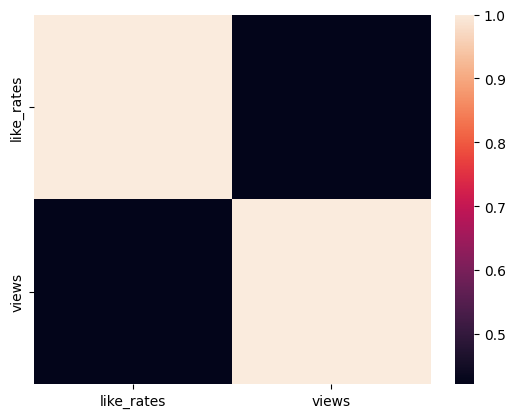

In [118]:
top_corr = top[["like_rates","views"]].corr()
print(f"top corr: {top_corr}")
sns.heatmap(top_corr)


bottom corr:             like_rates     views
like_rates    1.000000  0.454125
views         0.454125  1.000000


<Axes: >

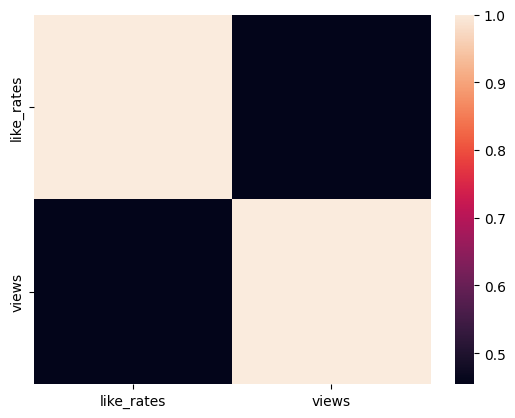

In [119]:
bottom_corr = bottom[["like_rates","views"]].corr()
print(f"bottom corr: {bottom_corr}")
sns.heatmap(bottom_corr)

In [120]:
engagement_day = df.groupby("day")["views"].sum().sort_values(ascending=False)
engagement_day

day
Friday       23582978393
Thursday     16051496678
Tuesday      13938147018
Wednesday    13644783188
Monday       12292988126
Sunday       10838660993
Saturday      6205038066
Name: views, dtype: int64

In [124]:
label = engagement_day.index.to_list()
x = engagement_day.values.tolist()

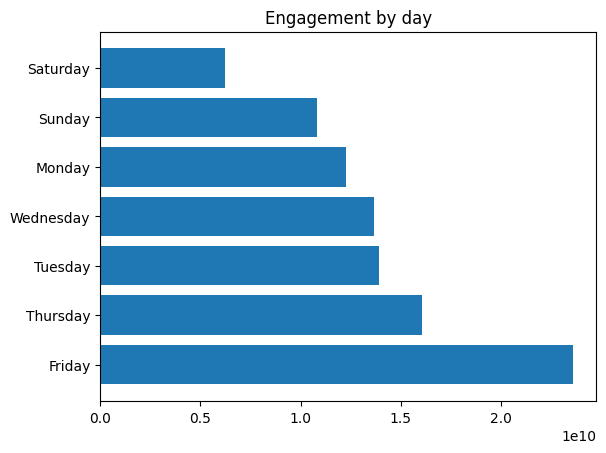

In [125]:
plt.barh(label,x)
plt.title("Engagement by day")
plt.savefig("charts/engagement_by_day.png")
plt.show()

In [126]:
df["title_length"] = df["title"].str.len() 

In [127]:
title_lenth_corr = df[["title_length","views"]].corr()

In [128]:
title_lenth_corr

,title_length,views
title_length,1.000000,-0.035569
views,-0.035569,1.000000


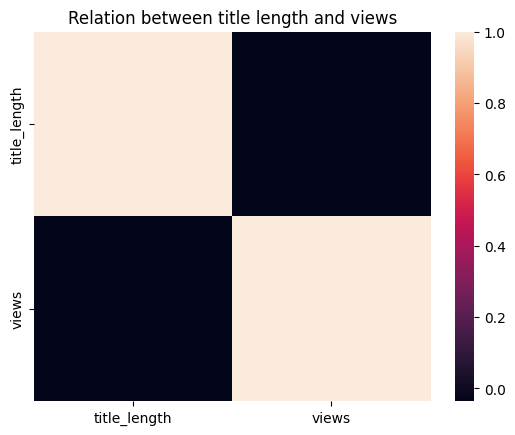

In [129]:
sns.heatmap(title_lenth_corr)
plt.title("Relation between title length and views")
plt.savefig("charts/title_len_views_relation.png")
plt.show()

In [130]:
# A new country stats begins

In [131]:
ca_data = pd.read_csv("datas/CAvideos.csv")

In [132]:
ca_df = pd.DataFrame(ca_data)

In [133]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [134]:
ca_df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [135]:
# even though there are 1296 null description it can be ingored as this description wont contribute much to analysis

In [136]:
ca_df.duplicated().sum()

np.int64(0)

In [137]:
# Since there is no duplicated value no need to drop duplicates

In [138]:
ca_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [139]:
ca_df["trending_date"] = pd.to_datetime(ca_df["trending_date"], format="%y.%d.%m")
ca_df["publish_time"] = pd.to_datetime(ca_df["publish_time"])

In [140]:
# Comparative Statistics: 

In [141]:
us_average_views = df["views"].mean()
ca_average_views = ca_df["views"].mean()

if us_average_views > ca_average_views:
    print("US has more average views than CA")
elif us_average_views == ca_average_views:
    print("Both US and CA has equal views count")
else:
    print("CA has more views count than US")


US has more average views than CA


In [142]:
ca_df["like_rates"] = ca_df["likes"]/ca_df["views"]
ca_df["dislike_rates"] = ca_df["dislikes"]/ca_df["views"]
ca_df["comment_rate"] = ca_df["comment_count"]/ca_df["views"]

In [143]:
US_like_rate = df["like_rates"].mean()
US_dislike_rate = df["dislike_rates"].mean()
US_comment_rate = df["comment_rate"].mean()

CA_like_rate = ca_df["like_rates"].mean()
CA_dislike_rate = ca_df["dislike_rates"].mean()
CA_comment_rate = ca_df["comment_rate"].mean()


In [144]:
US_like_rate > CA_like_rate

np.True_

In [145]:
US_dislike_rate > CA_dislike_rate

np.True_

In [146]:
US_comment_rate > CA_comment_rate

np.False_

In [147]:
# Since US_comment is not higher than CA_comment rate lets check if they are equal

In [148]:
US_comment_rate == CA_comment_rate

np.False_

In [149]:
# NO comment rate is not equal for US an CA so CA has higher comment rate than US on average. 

In [150]:
ca_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_rates,dislike_rates,comment_rate
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,0.045891,0.002531,0.007336
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,0.125949,0.001664,0.012842
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.045758,0.001673,0.002563
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.063096,0.000949,0.008359
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,0.048746,0.000629,0.002538


In [151]:
ca_df["day"] = ca_df["publish_time"].dt.day_name()
ca_df["hour"] = ca_df["publish_time"].dt.hour

In [152]:
ca_df.groupby("day")["views"].max().sort_values(ascending=False)

day
Wednesday    137843120
Sunday        98938809
Friday        80738011
Tuesday       53071887
Thursday      47778378
Saturday      47362934
Monday        43738208
Name: views, dtype: int64

In [153]:
# We can concluse that in CA country Youtube gets most views on Wednesday and least views on Monday

In [154]:
df.groupby("day")["views"].max().sort_values(ascending=False)

day
Sunday       225211923
Wednesday    149376127
Friday       148689896
Thursday     122544931
Tuesday       94254507
Monday        71560694
Saturday      60635812
Name: views, dtype: int64

In [178]:
# We can conclude that in US country Youtube gets most views on Sunday and least views on Saturaday

In [156]:
# Find most popular category in each nation. 

In [157]:
import json

In [158]:
with open("datas/US_category_id.json","r", encoding="utf-8") as f:
    data = json.load(f)

In [159]:
print(data)

{'kind': 'youtube#videoCategoryListResponse', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'yout

In [160]:
us_category = df.groupby("category_id")["views"].sum().sort_values(ascending=False)[:5]
us_category

category_id
10    40126286541
24    20561101882
1      7267792432
23     5111266590
22     4910004664
Name: views, dtype: int64

In [161]:
us_category_index = us_category.index.to_list()
print(us_category_index)

[10, 24, 1, 23, 22]


In [162]:
data_list = data["items"]
id_title = {}
for i in data_list:
    try:
        id_title[f"{i['id']}"]
        continue
    except KeyError:
        id_title[f"{i['id']}"]= i['snippet']["title"]

# Category with most views in USA: 
for id in us_category_index:
    print(f"{id}: {id_title[f'{id}']}")

10: Music
24: Entertainment
1: Film & Animation
23: Comedy
22: People & Blogs


In [163]:
for i in data_list:
    print(i['snippet']['title'])

Film & Animation
Autos & Vehicles
Music
Pets & Animals
Sports
Short Movies
Travel & Events
Gaming
Videoblogging
People & Blogs
Comedy
Entertainment
News & Politics
Howto & Style
Education
Science & Technology
Nonprofits & Activism
Movies
Anime/Animation
Action/Adventure
Classics
Comedy
Documentary
Drama
Family
Foreign
Horror
Sci-Fi/Fantasy
Thriller
Shorts
Shows
Trailers


In [164]:
# Now top 10 most category in CA: 
with open("datas/CA_category_id.json","r",encoding="utf-8") as f:
    ca_data = json.load(f)

In [165]:
print(ca_data["items"])

[{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM1XVQ9zbGec"', 'id': '17', 'snippet': {'channelId'

In [166]:
ca_total_views = ca_df.groupby("category_id")["views"].sum().sort_values(ascending=False)[:5]

In [167]:
indexs = ca_total_views.index.to_list()

In [168]:
print(indexs)

[24, 10, 23, 22, 17]


In [169]:
ca_data_list = ca_data["items"]

In [170]:
ca_data_list

[{'kind': 'youtube#videoCategory',
  'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHe

In [171]:
ca_id_title = {}
for i in ca_data_list:
    try:
        ca_id_title[f"{i['id']}"]
        continue
    except KeyError:
        ca_id_title[f"{i['id']}"] = i["snippet"]["title"]

for id in indexs:
    print(f"{id}: {ca_id_title[f'{id}']}")

24: Entertainment
10: Music
23: Comedy
22: People & Blogs
17: Sports


In [172]:
us_ = df[["views","likes"]].corr()
print(us_)

          views     likes
views  1.000000  0.849179
likes  0.849179  1.000000


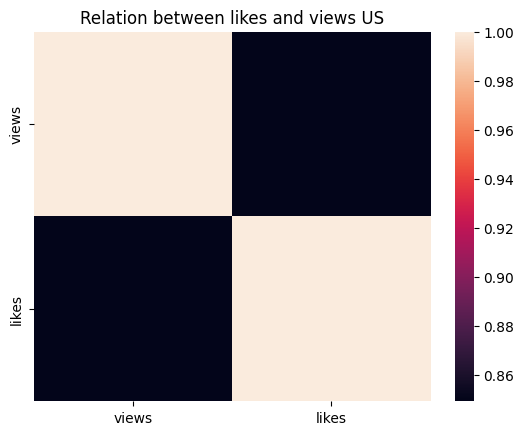

In [173]:
sns.heatmap(us_)
plt.title("Relation between likes and views US")
plt.savefig("charts/Likes_views_relation_us.png")
plt.show()

In [174]:
ca_ = ca_df[["views","likes"]].corr()
print(ca_)

          views     likes
views  1.000000  0.828964
likes  0.828964  1.000000


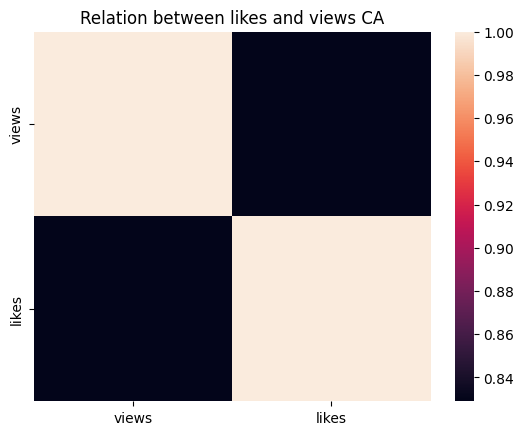

In [175]:
sns.heatmap(ca_)
plt.title("Relation between likes and views CA")
plt.savefig("charts/Likes_views_relation_ca.png")
plt.show()

In [176]:
df.head()
df.groupby("day")["trending_date"].nunique().sort_values(ascending=False)


day
Friday       205
Monday       205
Sunday       205
Tuesday      205
Thursday     205
Wednesday    205
Saturday     203
Name: trending_date, dtype: int64

In [177]:
ca_df.groupby("day")["trending_date"].nunique().sort_values(ascending=False)

day
Thursday     197
Wednesday    195
Saturday     194
Monday       191
Friday       191
Tuesday      187
Sunday       184
Name: trending_date, dtype: int64